In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [120]:
os_loc = os.getcwd()

In [121]:
data1 = pd.read_excel(os_loc + '/재정데이터/열린재정/1. 예산/1-1-1. 세입 수입 예산편성현황(총액).xlsx')
data5 = pd.read_excel(os_loc + '/재정데이터/열린재정/2. 집행/2-1. 월별 수입징수상황(관항목).xlsx')
data7 = pd.read_excel(os_loc + '/재정데이터/열린재정/3. 결산/3-1. 세입 수입 결산 현황(관 항).xlsx')
data8 = pd.read_excel(os_loc + '/재정데이터/열린재정/3. 결산/3-2. 세출 지출 결산 현황(단위사업, 목).xlsx')
total_income = pd.read_csv(os_loc + '/재정데이터/주요재정통계/주요재정통계 재정수입/회계·기금별 총수입 추이.csv', encoding = 'cp949')
total_spending = pd.read_csv(os_loc + '/재정데이터/주요재정통계/주요재정통계 재정지출/재정지출 추이(총지출).csv', encoding = 'cp949')

In [127]:
data1.head()

,회계연도,소관명,회계명,계정명,수입관명,수입항명,수입목명,정부안금액(천원),국회확정금액(천원)
0,2021,감사원,일반회계,NaN,경상이전수입,기타경상이전수입,기타경상이전수입,20000,20000
1,2021,감사원,일반회계,NaN,수입대체경비수입,잡수입,기타잡수입,475000,475000
2,2021,감사원,일반회계,NaN,재산수입,관유물대여료,건물대여료,19000,19000
3,2021,감사원,일반회계,NaN,재산수입,관유물대여료,토지대여료,1000,1000
4,2021,감사원,일반회계,NaN,재화및용역판매수입,잡수입,기타잡수입,94000,94000


In [123]:
data5.head()

,회계년도,회계월,소관,소관명,회계,회계명,수입관코드,수입관명,수입항코드,수입항명,수입목코드,수입목명,예산(원),징수결정본월금액(원),징수결정누계금액(원),수납본월금액(원),수납누계금액(원),불납결손본월금액(원),불납결손누계금액(원),미수납누계금액(원)
0,2015,1,4,국가정보원,110,일반회계,11,재산수입,54,기타이자수입및재산수입,545,기타재산수입,1159000000,0,0,0,0,0,0,0
1,2015,1,6,국회,110,일반회계,11,재산수입,51,관유물대여료,511,토지대여료,4000000,130330,130330,130330,130330,0,0,0
2,2015,1,6,국회,110,일반회계,11,재산수입,51,관유물대여료,512,건물대여료,813000000,15974080,15974080,0,0,0,0,15974080
3,2015,1,6,국회,110,일반회계,11,재산수입,54,기타이자수입및재산수입,545,기타재산수입,5000000,640780,640780,520910,520910,0,0,119870
4,2015,1,6,국회,110,일반회계,12,경상이전수입,57,변상금및위약금,571,변상금,8000000,134714840,134714840,0,0,0,0,134714840


In [124]:
data7.head()

,회계년도,소관명,회계명,계정명,수입관,수입관명,수입항,수입항명,세입예산액/당초수입계획액(원),세입예산액/수정수입계획액(원),이체등증감액(원),세입예산현액/수입계획현액(원),징수결정액(원),수납액(원),수납순액(원),불납결손액(원),미수납액(원)
0,2007,대통령비서실,일반회계,NaN,11,재산수입,51,관유물대여료,0,0,0,0,2978180,2978180,2978180,0,0
1,2007,대통령비서실,일반회계,NaN,12,경상이전수입,59,기타경상이전수입,0,0,0,0,1376190,1376190,1376190,0,0
2,2007,대통령비서실,일반회계,NaN,15,관유물매각대,71,고정자산매각대,25500000,25500000,0,25500000,16497000,16497000,16497000,0,0
3,2007,대통령경호실,일반회계,NaN,11,재산수입,54,기타이자수입및재산수입,17530000,17530000,0,17530000,11530000,11530000,11530000,0,0
4,2007,대통령경호실,일반회계,NaN,12,경상이전수입,59,기타경상이전수입,0,0,0,0,7157060,7157060,7157060,0,0


In [125]:
data8.head()

,회계연도,소관명,회계명,계정명,분야,분야명,부문,부문명,프로그램,프로그램명,...,전용감액(원),이용증액(원),이용감액(원),이체증액(원),이체감액(원),세출예산현액/지출계획현액(원),지출액(원),지출순액(원),다음년도이월액(원),불용액(원)
0,2007,대통령비서실,일반회계,NaN,10,일반공공행정,016,일반행정,1000,대통령비서실 운영,...,0,0,0,0,0,23513600000,23408392580,23408392580,0,105207420
1,2007,대통령비서실,일반회계,NaN,10,일반공공행정,016,일반행정,1000,대통령비서실 운영,...,0,0,0,0,0,2166660000,1950424530,1950424530,0,216235470
2,2007,대통령비서실,일반회계,NaN,10,일반공공행정,016,일반행정,1000,대통령비서실 운영,...,0,0,0,0,0,1177056000,1157224510,1157224510,0,19831490
3,2007,대통령비서실,일반회계,NaN,10,일반공공행정,016,일반행정,1000,대통령비서실 운영,...,0,0,0,0,0,6785956000,6258610840,6258610840,0,527345160
4,2007,대통령비서실,일반회계,NaN,10,일반공공행정,016,일반행정,1000,대통령비서실 운영,...,0,0,0,0,0,784026000,730491270,730491270,0,53534730


### relplot : 산점도나 선그래프를 서브플롯으로 그리는 메서드

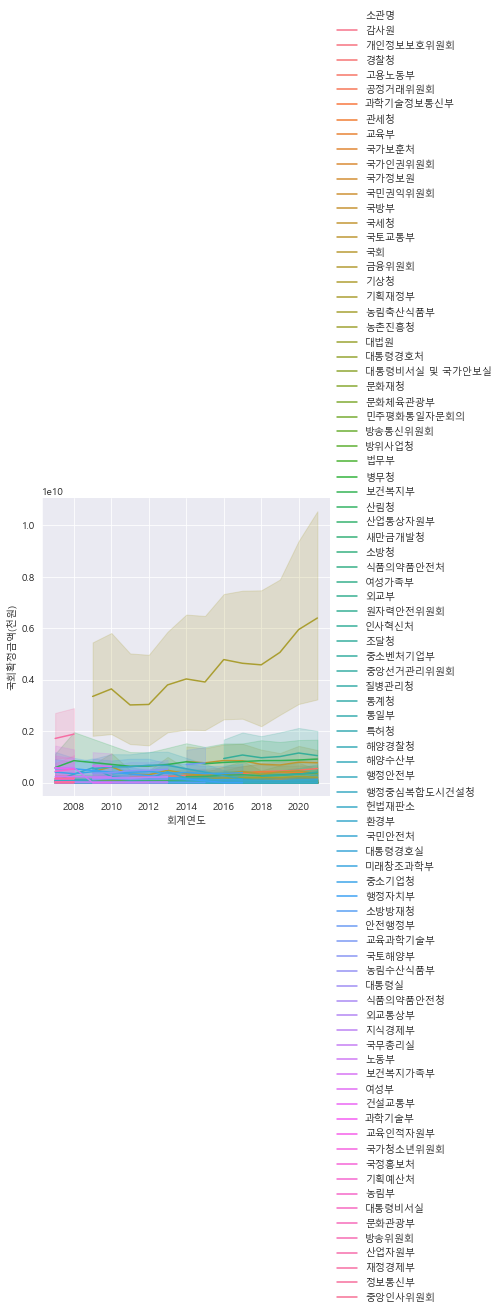

In [128]:
%matplotlib inline

from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

sns.relplot(kind="line", data=data1, x="회계연도", y="국회확정금액(천원)", hue="소관명")

#kind : 어떤 그래프를  "scatter" or "line"
#col : "어떤 항목으로 플롯을 나눌지 선정"
#col_wrap : 한줄에 그려질 그래프 수
plt.show()

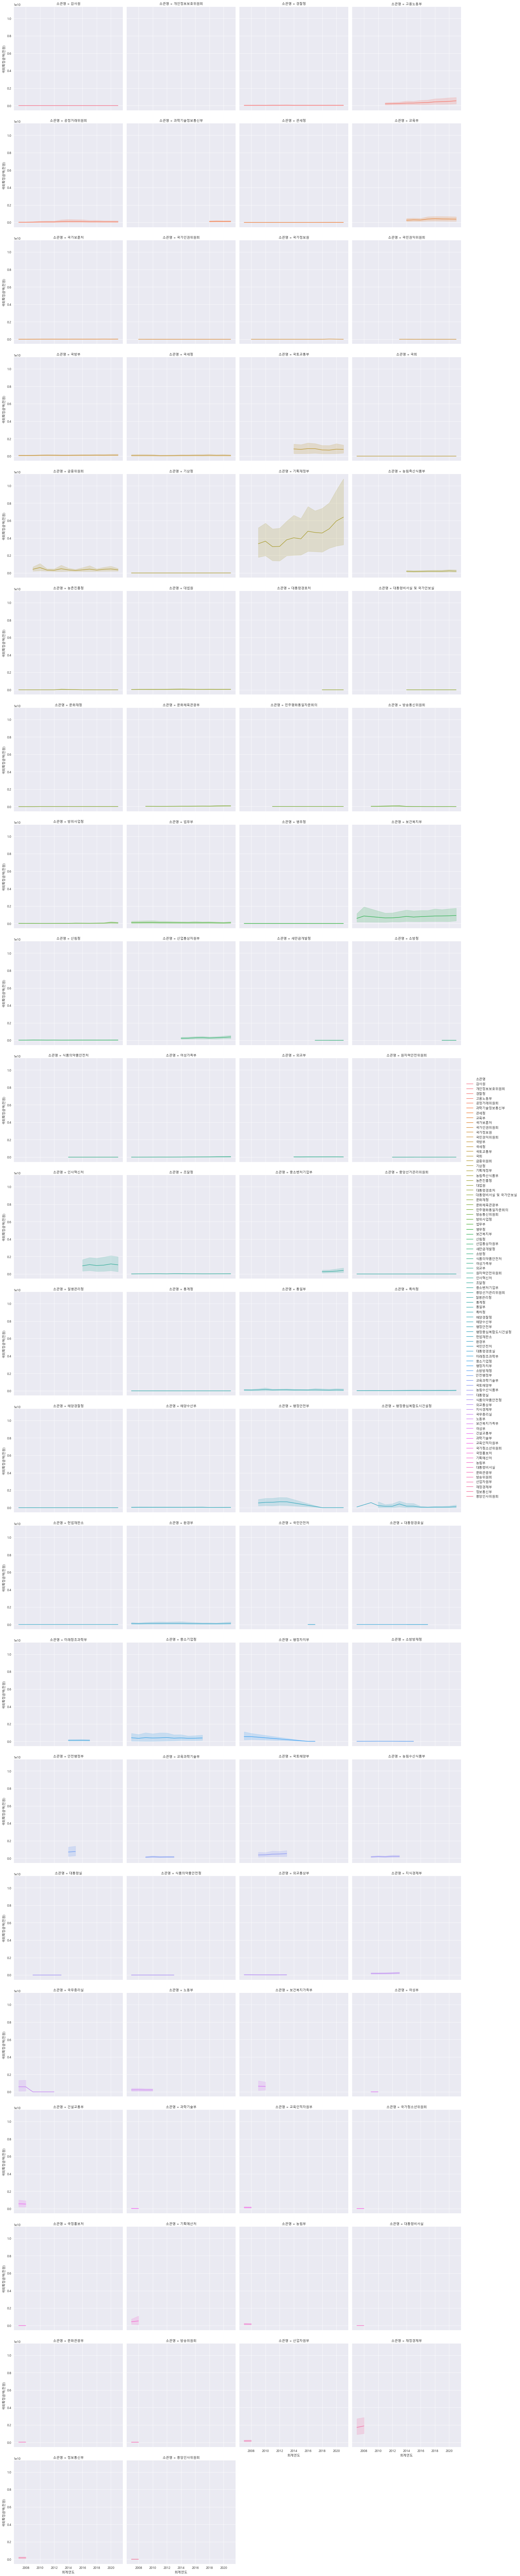

In [129]:
%matplotlib inline

from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

sns.relplot(kind="line", data=data1, x="회계연도", y="국회확정금액(천원)", hue="소관명", col = "소관명", col_wrap = 4)

#kind : 어떤 그래프를  "scatter" or "line"
#col : "어떤 항목으로 플롯을 나눌지 선정"
#col_wrap : 한줄에 그려질 그래프 수
plt.show()

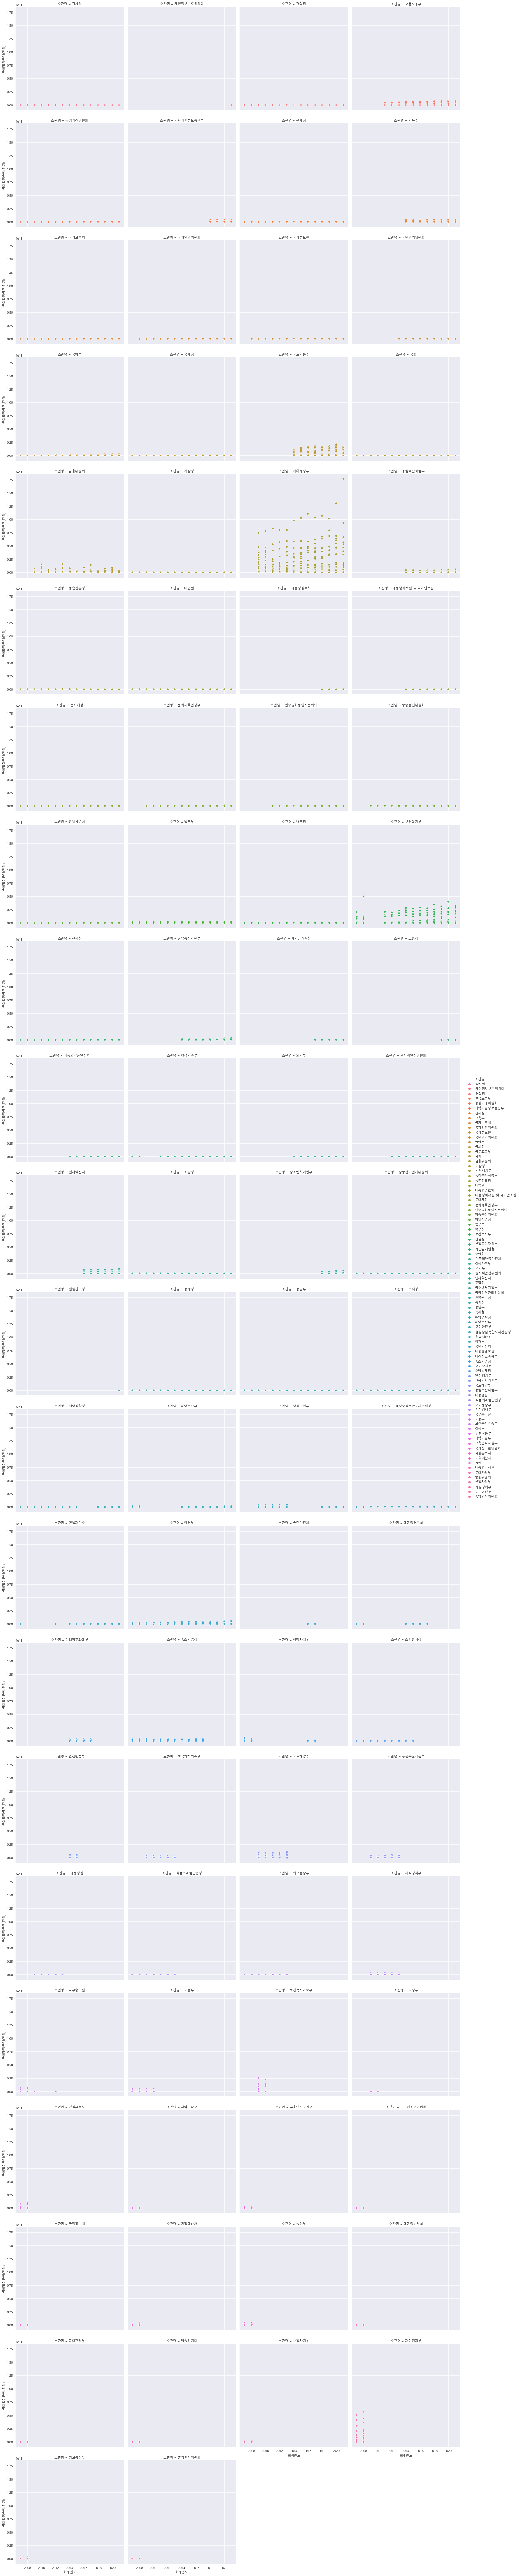

In [130]:
%matplotlib inline

from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

sns.relplot(kind="scatter", data=data1, x="회계연도", y="국회확정금액(천원)", hue="소관명", col = "소관명", col_wrap = 4)

#kind : 어떤 그래프를  "scatter" or "line"
#col : "어떤 항목으로 플롯을 나눌지 선정"
#col_wrap : 한줄에 그려질 그래프 수
plt.show()

In [131]:
len(data1['소관명'].unique())

86

In [132]:
def name_change(data):
    for i in range(len(data['소관명'])):
        if data['소관명'][i] == '재정경제부':
            data['소관명'][i] = '기획재정부'
        elif data['소관명'][i] == '산업자원부':
            data['소관명'][i] = '산업통상자원부'
        elif data['소관명'][i] == '과학기술부':
            data['소관명'][i] = '과학기술정보통신부'
        elif data['소관명'][i] == '건설교통부':
            data['소관명'][i] = '국토교통부'
        elif data['소관명'][i] == '정보통신부':
            data['소관명'][i] = '방송통신위원회'
        elif data['소관명'][i] == '국정홍보처':
            data['소관명'][i] = '문화체육관광부'
        elif data['소관명'][i] == '기획예산처':
            data['소관명'][i] = '기획재정부'
        elif data['소관명'][i] == '여성부':
            data['소관명'][i] = '여성가족부'
        elif data['소관명'][i] == '중앙인사위원회':
            data['소관명'][i] = '인사혁신처'
        elif data['소관명'][i] == '방송위원회':
            data['소관명'][i] = '방송통신위원회'
        elif data['소관명'][i] == '미래창조과학부':
            data['소관명'][i] = '과학기술정보통신부'
        elif data['소관명'][i] == '국민안전처':
            data['소관명'][i] = '행정안전부'
        elif data['소관명'][i] == '농림부':
            data['소관명'][i] = '농림축산식품부'
        elif data['소관명'][i] == '문화관광부':
            data['소관명'][i] = '문화체육관광부'
        elif data['소관명'][i] == '교육인적자원부':
            data['소관명'][i] = '교육부'
        elif data['소관명'][i] == '국가청소년위원회':
            data['소관명'][i] = '보건복지부'
        elif data['소관명'][i] == '보건복지가족부':
            data['소관명'][i] = '보건복지부'
        elif data['소관명'][i] == '식품의약품안전청':
            data['소관명'][i] = '식품의약품안전처'
        elif data['소관명'][i] =='농림수산식품부':
            data['소관명'][i] = '농림축산식품부'
        elif data['소관명'][i] == '지식경제부':
            data['소관명'][i] = '산업통상자원부'
        elif data['소관명'][i] == '소방방재청':
            data['소관명'][i] = '소방청'
        elif data['소관명'][i] == '노동부':
            data['소관명'][i] = '고용노동부'
        elif data['소관명'][i] == '외교통상부':
            data['소관명'][i] = '외교부'
        elif data['소관명'][i] == '국민안전처':
            data['소관명'][i] = '행정안전부'
        elif data['소관명'][i] == '국토해양부':
            data['소관명'][i] = '국토교통부'
        elif data['소관명'][i] == '교육과학기술부':
            data['소관명'][i] = '교육부'
        elif data['소관명'][i] == '안전행정부':
            data['소관명'][i] = '행정안전부'
        elif data['소관명'][i] == '행정자치부':
            data['소관명'][i] = '행정안전부'
        elif data['소관명'][i] == '중소기업청':
            data['소관명'][i] = '중소벤처기업부'
        elif data['소관명'][i] == '대통령경호실':
            data['소관명'][i] = '대통령경호처'
        elif data['소관명'][i] == '대통령비서실':
            data['소관명'][i] = '대통령비서실 및 국가안보실'
        elif data['소관명'][i] == '대통령실':
            data['소관명'][i] = '대통령비서실 및 국가안보실'
        elif data['소관명'][i] == '국무총리실':
            data['소관명'][i] = '대통령비서실 및 국가안보실'
    
    return data

In [133]:
data1 = name_change(data1)

<ipython-input-132-5ad471f5414a>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['소관명'][i] = '행정안전부'
<ipython-input-132-5ad471f5414a>:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['소관명'][i] = '대통령경호처'
<ipython-input-132-5ad471f5414a>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['소관명'][i] = '과학기술정보통신부'
<ipython-input-132-5ad471f5414a>:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

<ipython-input-132-5ad471f5414a>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['소관명'][i] = '인사혁신처'


In [135]:
len(data1['소관명'].unique())

54

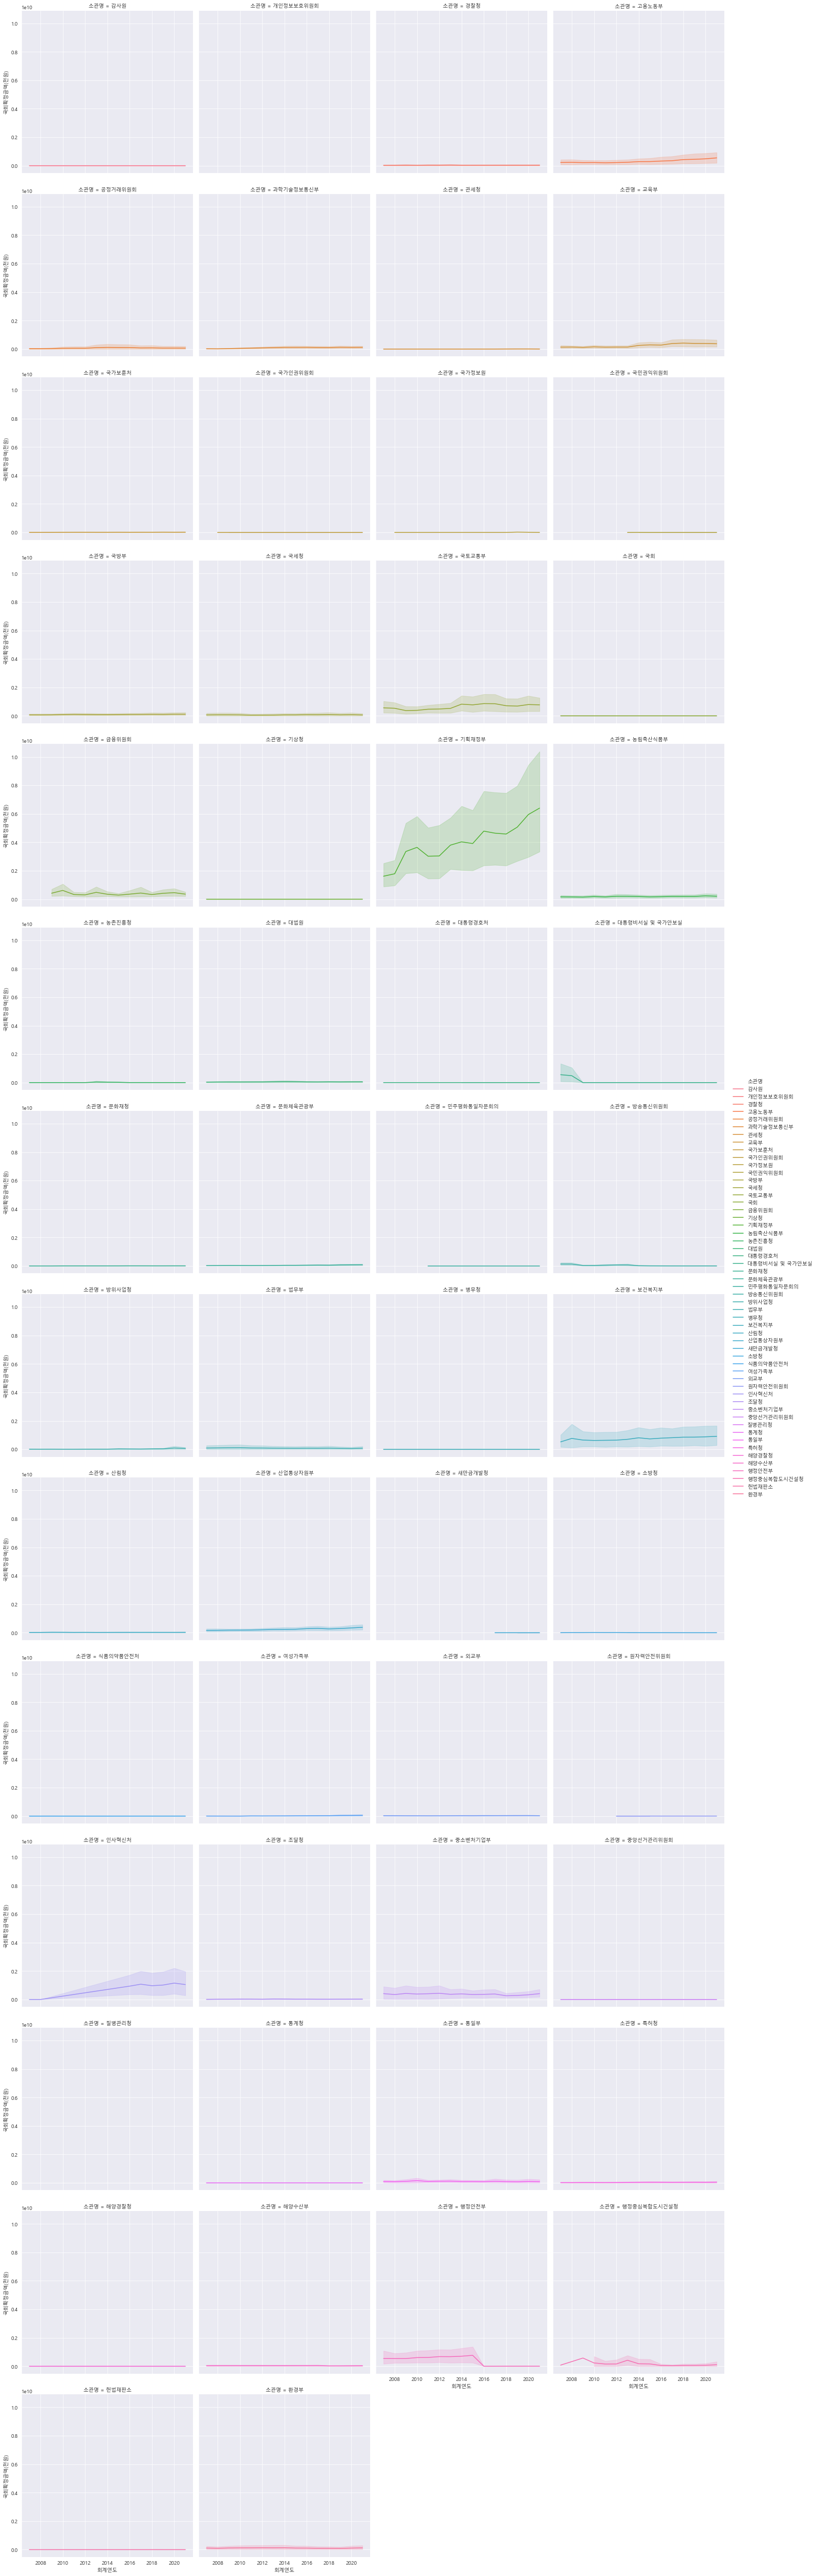

In [134]:
%matplotlib inline

from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

sns.relplot(kind="line", data=data1, x="회계연도", y="국회확정금액(천원)", hue="소관명", col = "소관명", col_wrap = 4)

#kind : 어떤 그래프를  "scatter" or "line"
#col : "어떤 항목으로 플롯을 나눌지 선정"
#col_wrap : 한줄에 그려질 그래프 수
plt.show()

In [136]:
data7 = name_change(data7)

<ipython-input-132-5ad471f5414a>:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['소관명'][i] = '대통령비서실 및 국가안보실'
<ipython-input-132-5ad471f5414a>:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['소관명'][i] = '대통령경호처'
<ipython-input-132-5ad471f5414a>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['소관명'][i] = '대통령비서실 및 국가안보실'
<ipython-input-132-5ad471f5414a>:4: SettingWithCopyWarning: 
A value is trying to be set on a co

<ipython-input-132-5ad471f5414a>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['소관명'][i] = '과학기술정보통신부'
<ipython-input-132-5ad471f5414a>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['소관명'][i] = '행정안전부'
<ipython-input-132-5ad471f5414a>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['소관명'][i] = '행정안전부'


In [137]:
data8 = name_change(data8)

<ipython-input-132-5ad471f5414a>:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['소관명'][i] = '대통령비서실 및 국가안보실'
<ipython-input-132-5ad471f5414a>:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['소관명'][i] = '대통령경호처'
<ipython-input-132-5ad471f5414a>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['소관명'][i] = '대통령비서실 및 국가안보실'
<ipython-input-132-5ad471f5414a>:4: SettingWithCopyWarning: 
A value is trying to be set on a co

<ipython-input-132-5ad471f5414a>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['소관명'][i] = '과학기술정보통신부'
<ipython-input-132-5ad471f5414a>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['소관명'][i] = '행정안전부'
<ipython-input-132-5ad471f5414a>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['소관명'][i] = '행정안전부'


## 스타일 테마 설정 (darkgrid, whitegrid, dark, white, ticks)

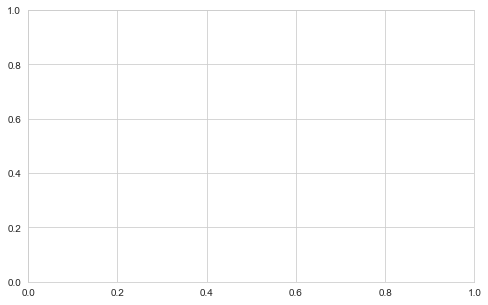

In [14]:
sns.set_style('whitegrid')

fig, ax = plt.subplots(1, 1, figsize=(8,5))

plt.show()

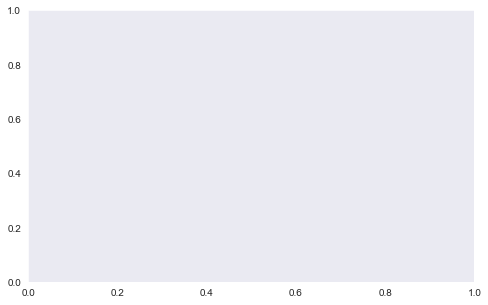

In [15]:
sns.set_style('dark')

fig, ax = plt.subplots(1, 1, figsize=(8,5))

plt.show()

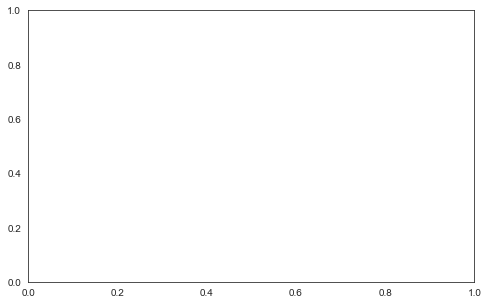

In [16]:
sns.set_style('white')

fig, ax = plt.subplots(1, 1, figsize=(8,5))

plt.show()

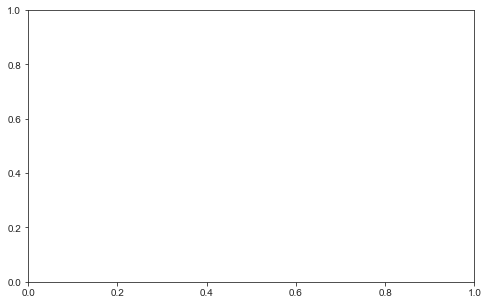

In [17]:
sns.set_style('ticks')

fig, ax = plt.subplots(1, 1, figsize=(8,5))

plt.show()

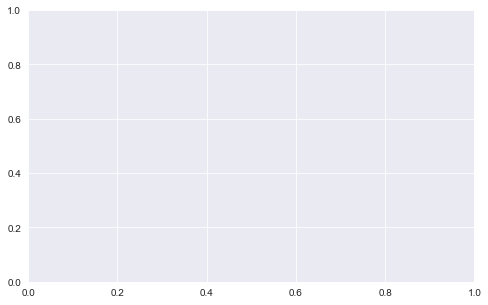

In [18]:
sns.set_style('darkgrid')

fig, ax = plt.subplots(1, 1, figsize=(8,5))

plt.show()

### regplot : 회귀선이 있는 산점도

In [19]:
max(data1['국회확정금액(천원)'])

176385467000

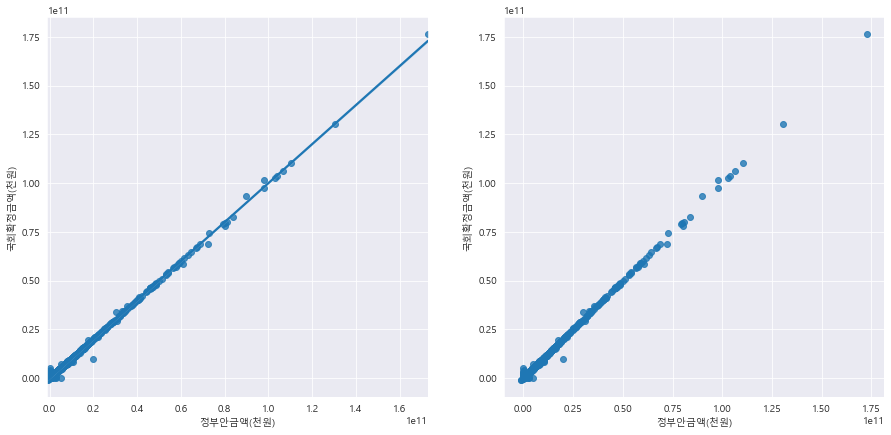

In [20]:
%matplotlib inline

from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

fig, ax = plt.subplots(1, 2, figsize=(15,7))

sns.regplot(x = '정부안금액(천원)',
            y = '국회확정금액(천원)',
            data = data1,
            ax = ax[0])

sns.regplot(x = '정부안금액(천원)',
            y = '국회확정금액(천원)',
            data = data1,
            ax = ax[1],
            fit_reg=False)
#fit_Reg로 회귀선의 유무를 표현함.
plt.show()


### scatterplot

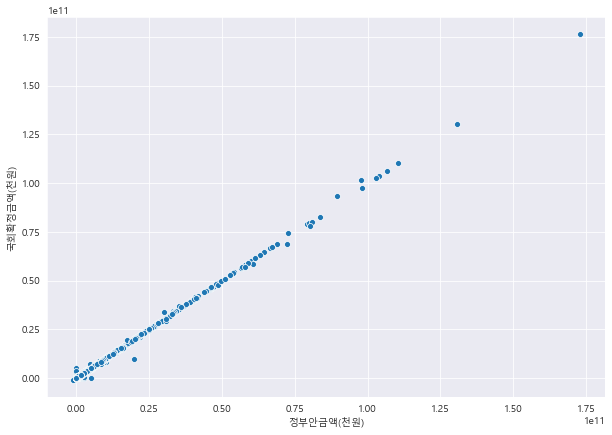

In [21]:
%matplotlib inline

from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

fig, ax = plt.subplots(1, 1, figsize=(10,7))

sns.scatterplot(x = '정부안금액(천원)',
            y = '국회확정금액(천원)',
            data = data1)

plt.show()

### Heatmap


In [138]:
data7['회계년도'].unique()

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020], dtype=int64)

In [139]:
#재정수입 결산
data7_piv = pd.pivot_table(data7, index = '회계년도', columns = '소관명', aggfunc = 'size')
data7_piv

소관명,4·16세월호참사 특별조사위원회,5·18민주화운동 진상규명조사위원회,가습기살균제사건과 4·16세월호참사 특별조사위원회,감사원,개인정보보호위원회,경찰청,고용노동부,공정거래위원회,과학기술정보통신부,관세청,...,통계청,통일부,특임장관실,특허청,해양경찰청,해양수산부,행정안전부,행정중심복합도시건설청,헌법재판소,환경부
회계년도,,,,,,,,,,,,,,,,,,,,,
2007,NaN,NaN,NaN,4.0,NaN,34.0,65.0,6.0,35.0,11.0,...,8.0,16.0,NaN,15.0,11.0,74.0,21.0,5.0,2.0,44.0
2008,NaN,NaN,NaN,4.0,NaN,33.0,62.0,6.0,17.0,12.0,...,7.0,13.0,NaN,17.0,10.0,45.0,29.0,6.0,2.0,47.0
2009,NaN,NaN,NaN,4.0,NaN,33.0,65.0,6.0,NaN,11.0,...,8.0,11.0,NaN,17.0,10.0,NaN,24.0,6.0,2.0,48.0
2010,NaN,NaN,NaN,4.0,NaN,39.0,65.0,7.0,NaN,12.0,...,8.0,13.0,NaN,18.0,10.0,NaN,21.0,8.0,2.0,51.0
2011,NaN,NaN,NaN,4.0,NaN,26.0,68.0,7.0,NaN,11.0,...,8.0,12.0,1.0,17.0,10.0,NaN,23.0,7.0,3.0,58.0
2012,NaN,NaN,NaN,4.0,NaN,25.0,72.0,7.0,NaN,11.0,...,9.0,16.0,2.0,17.0,10.0,NaN,24.0,7.0,2.0,62.0
2013,NaN,NaN,NaN,6.0,NaN,25.0,66.0,5.0,83.0,11.0,...,9.0,15.0,1.0,15.0,9.0,71.0,35.0,8.0,2.0,66.0
2014,NaN,NaN,NaN,7.0,NaN,27.0,66.0,6.0,88.0,12.0,...,9.0,15.0,NaN,15.0,10.0,73.0,37.0,6.0,2.0,68.0
2015,NaN,NaN,NaN,7.0,NaN,27.0,67.0,6.0,83.0,11.0,...,9.0,16.0,NaN,16.0,9.0,82.0,31.0,8.0,3.0,66.0


In [140]:
data7_piv = data7_piv.fillna(0)
data7_piv = data7_piv.astype('int')

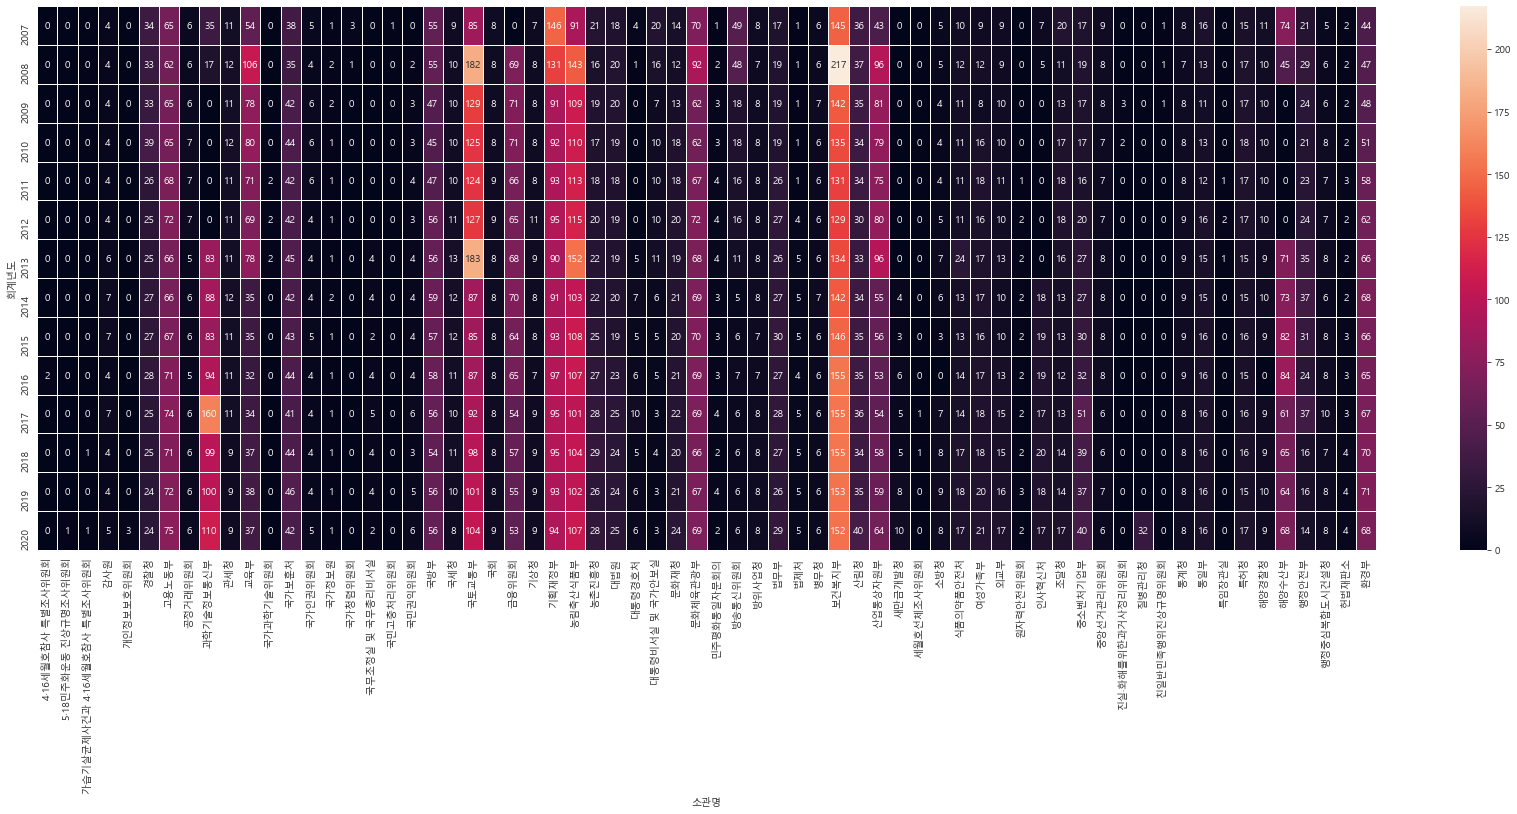

In [141]:
%matplotlib inline

from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

fig, ax = plt.subplots(1, 1, figsize=(30,10))

sns.heatmap(data7_piv, annot=True, fmt="d", linewidths=1)
# annot : cell 안에 숫자를 집어넣는지 유무
# fmt : cell 안에 들어가는 숫자의 데이터 형태 지정("d"는 정수형 "*.f"는 실수형(*에는 숫자가 들어가고 소수점 자리수를 나타냄))
# linewidths : cell 사이의 선을 집어넣으며 선의 굵기를 지정한다.
plt.show()

In [142]:
#재정지출 결산
data8_piv = pd.pivot_table(data8, index = '회계연도', columns = '소관명', aggfunc = 'size')
data8_piv

소관명,4·16세월호참사 특별조사위원회,5·18민주화운동 진상규명조사위원회,가습기살균제사건과 4·16세월호참사 특별조사위원회,감사원,개인정보보호위원회,경찰청,고용노동부,공정거래위원회,과학기술정보통신부,관세청,...,통계청,통일부,특임장관실,특허청,해양경찰청,해양수산부,행정안전부,행정중심복합도시건설청,헌법재판소,환경부
회계연도,,,,,,,,,,,,,,,,,,,,,
2007,NaN,NaN,NaN,51.0,NaN,241.0,419.0,68.0,167.0,83.0,...,151.0,137.0,NaN,124.0,140.0,421.0,357.0,23.0,30.0,472.0
2008,NaN,NaN,NaN,46.0,NaN,263.0,430.0,71.0,141.0,87.0,...,189.0,143.0,NaN,133.0,146.0,402.0,901.0,37.0,33.0,549.0
2009,NaN,NaN,NaN,35.0,NaN,258.0,397.0,59.0,NaN,82.0,...,229.0,127.0,15.0,121.0,135.0,NaN,469.0,40.0,31.0,506.0
2010,NaN,NaN,NaN,39.0,NaN,255.0,388.0,48.0,NaN,83.0,...,137.0,157.0,15.0,115.0,139.0,NaN,518.0,40.0,36.0,501.0
2011,NaN,NaN,NaN,39.0,NaN,229.0,396.0,51.0,NaN,82.0,...,145.0,157.0,17.0,105.0,141.0,NaN,558.0,44.0,34.0,521.0
2012,NaN,NaN,NaN,39.0,NaN,234.0,423.0,75.0,NaN,86.0,...,151.0,158.0,18.0,101.0,133.0,NaN,527.0,39.0,33.0,537.0
2013,NaN,NaN,NaN,40.0,NaN,233.0,416.0,73.0,596.0,85.0,...,145.0,158.0,18.0,102.0,137.0,509.0,1102.0,34.0,33.0,560.0
2014,NaN,NaN,NaN,40.0,NaN,253.0,434.0,73.0,571.0,84.0,...,144.0,175.0,NaN,103.0,136.0,553.0,1216.0,38.0,38.0,554.0
2015,24.0,NaN,NaN,40.0,NaN,261.0,439.0,76.0,570.0,91.0,...,146.0,168.0,NaN,103.0,137.0,556.0,1336.0,34.0,33.0,549.0


In [143]:
data8_piv = data8_piv.fillna(0)
data8_piv = data8_piv.astype('int')

In [144]:
data8_piv

소관명,4·16세월호참사 특별조사위원회,5·18민주화운동 진상규명조사위원회,가습기살균제사건과 4·16세월호참사 특별조사위원회,감사원,개인정보보호위원회,경찰청,고용노동부,공정거래위원회,과학기술정보통신부,관세청,...,통계청,통일부,특임장관실,특허청,해양경찰청,해양수산부,행정안전부,행정중심복합도시건설청,헌법재판소,환경부
회계연도,,,,,,,,,,,,,,,,,,,,,
2007,0,0,0,51,0,241,419,68,167,83,...,151,137,0,124,140,421,357,23,30,472
2008,0,0,0,46,0,263,430,71,141,87,...,189,143,0,133,146,402,901,37,33,549
2009,0,0,0,35,0,258,397,59,0,82,...,229,127,15,121,135,0,469,40,31,506
2010,0,0,0,39,0,255,388,48,0,83,...,137,157,15,115,139,0,518,40,36,501
2011,0,0,0,39,0,229,396,51,0,82,...,145,157,17,105,141,0,558,44,34,521
2012,0,0,0,39,0,234,423,75,0,86,...,151,158,18,101,133,0,527,39,33,537
2013,0,0,0,40,0,233,416,73,596,85,...,145,158,18,102,137,509,1102,34,33,560
2014,0,0,0,40,0,253,434,73,571,84,...,144,175,0,103,136,553,1216,38,38,554
2015,24,0,0,40,0,261,439,76,570,91,...,146,168,0,103,137,556,1336,34,33,549


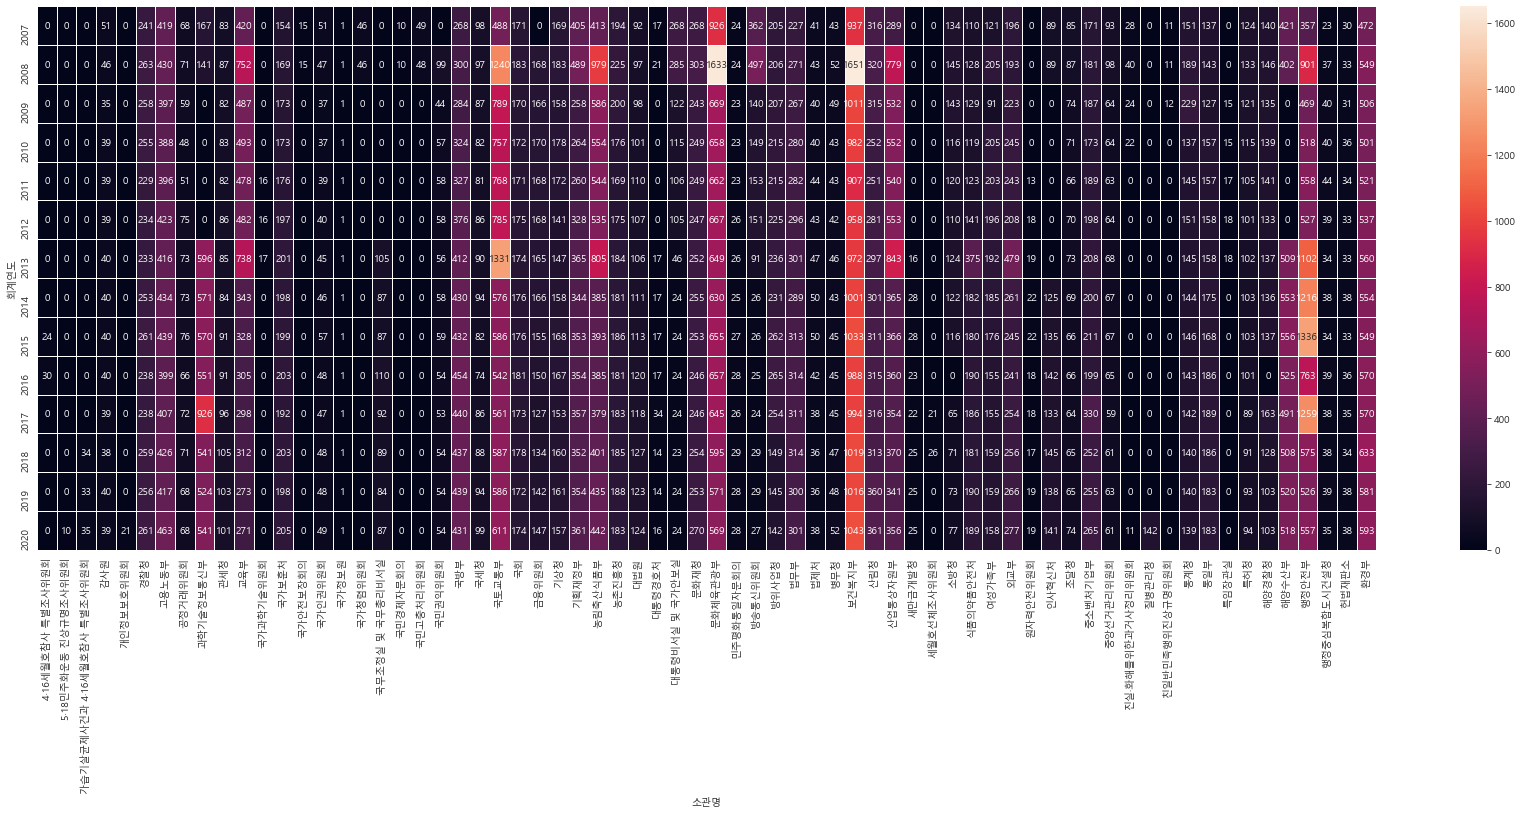

In [145]:
%matplotlib inline

from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

fig, ax = plt.subplots(1, 1, figsize=(30,10))

sns.heatmap(data8_piv, annot=True, fmt="d", linewidths=1)
plt.show()

### stripplot : 범주형 산점도 그래프

In [30]:
print(max(data5['예산(원)']))
print(min(data5['예산(원)']))

186294403000000
-600000000000


In [31]:
data5 = data5[data5['예산(원)'] > 0]

In [32]:
data5['예산(원)'] = data5['예산(원)'] / 1000000000 #십억

In [33]:
data5.rename(columns = {'예산(원)' : '예산(십억원)'}, inplace=True)
data5.head(10)

,회계년도,회계월,소관,소관명,회계,회계명,수입관코드,수입관명,수입항코드,수입항명,수입목코드,수입목명,예산(십억원),징수결정본월금액(원),징수결정누계금액(원),수납본월금액(원),수납누계금액(원),불납결손본월금액(원),불납결손누계금액(원),미수납누계금액(원)
0,2015,1,4,국가정보원,110,일반회계,11,재산수입,54,기타이자수입및재산수입,545,기타재산수입,1.159,0,0,0,0,0,0,0
1,2015,1,6,국회,110,일반회계,11,재산수입,51,관유물대여료,511,토지대여료,0.004,130330,130330,130330,130330,0,0,0
2,2015,1,6,국회,110,일반회계,11,재산수입,51,관유물대여료,512,건물대여료,0.813,15974080,15974080,0,0,0,0,15974080
3,2015,1,6,국회,110,일반회계,11,재산수입,54,기타이자수입및재산수입,545,기타재산수입,0.005,640780,640780,520910,520910,0,0,119870
4,2015,1,6,국회,110,일반회계,12,경상이전수입,57,변상금및위약금,571,변상금,0.008,134714840,134714840,0,0,0,0,134714840
5,2015,1,6,국회,110,일반회계,12,경상이전수입,57,변상금및위약금,572,위약금,0.020,0,0,0,0,0,0,0
6,2015,1,6,국회,110,일반회계,12,경상이전수입,59,기타경상이전수입,596,기타경상이전수입,0.600,525324680,525324680,455012450,455012450,0,0,70312230
7,2015,1,6,국회,110,일반회계,13,재화및용역판매수입,65,면허료및수수료,651,면허료및수수료,0.150,0,0,0,0,0,0,0
8,2015,1,6,국회,110,일반회계,13,재화및용역판매수입,69,잡수입,691,기타잡수입,0.050,4628600,4628600,4628600,4628600,0,0,0
9,2015,1,6,국회,110,일반회계,14,수입대체경비수입,69,잡수입,691,기타잡수입,0.126,0,0,0,0,0,0,0


In [34]:
print(max(data5['예산(십억원)']))
print(min(data5['예산(십억원)']))

186294.403
2e-06


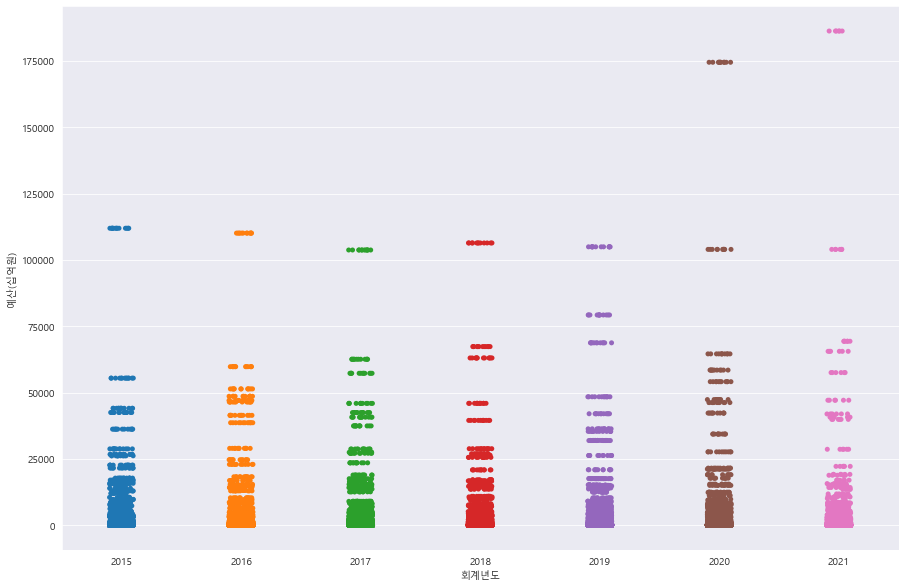

In [35]:
%matplotlib inline

from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

fig, ax = plt.subplots(1, 1, figsize=(15,10))

sns.stripplot(x = "회계년도", y="예산(십억원)", data = data5)

plt.show()

### stacked barplot

In [38]:
total_income

,연도,기준,일반회계(조원),특별회계(조원),기금(조원),세입 외(조원)
0,2014,결산,208.6,21.6,230.1,126.2
1,2015,결산,219.2,22.3,241.6,130.2
2,2016,결산,245.1,21.0,266.1,135.6
3,2017,결산,269.5,21.4,290.9,139.5
4,2018,결산,296.6,23.0,294.8,145.1
5,2019,결산,295.5,23.2,318.7,154.0
6,2020,본예산,295.9,24.0,319.9,161.9
7,2021,본예산,286.9,24.7,311.6,171.0


In [39]:
total_income.columns = ['연도', '기준', '일반회계', '특별회계', '기금', '세입외']
total_income

,연도,기준,일반회계,특별회계,기금,세입외
0,2014,결산,208.6,21.6,230.1,126.2
1,2015,결산,219.2,22.3,241.6,130.2
2,2016,결산,245.1,21.0,266.1,135.6
3,2017,결산,269.5,21.4,290.9,139.5
4,2018,결산,296.6,23.0,294.8,145.1
5,2019,결산,295.5,23.2,318.7,154.0
6,2020,본예산,295.9,24.0,319.9,161.9
7,2021,본예산,286.9,24.7,311.6,171.0


In [40]:
total_spending

,연도,기준,예산_일반회계(조원),예산_특별회계(조원),예산_소계(조원),기금(조원),세출 외(조원)
0,2014,결산,198.2,45.5,243.7,104.1,0.2
1,2015,결산,206.0,50.9,256.8,115.0,0.2
2,2016,결산,217.1,47.6,264.7,119.9,0.3
3,2017,결산,225.6,49.6,275.2,127.3,4.0
4,2018,결산,246.5,47.2,293.7,133.8,6.6
5,2019,결산,277.7,51.3,329.0,144.9,11.2
6,2020,본예산,296.0,55.1,351.1,161.1,0.0
7,2021,본예산,314.8,60.2,375.0,182.9,0.0


In [41]:
total_spending.columns = ['연도', '기준', '일반회계', '특별회계', '소계', '기금', '세출외']
total_spending

,연도,기준,일반회계,특별회계,소계,기금,세출외
0,2014,결산,198.2,45.5,243.7,104.1,0.2
1,2015,결산,206.0,50.9,256.8,115.0,0.2
2,2016,결산,217.1,47.6,264.7,119.9,0.3
3,2017,결산,225.6,49.6,275.2,127.3,4.0
4,2018,결산,246.5,47.2,293.7,133.8,6.6
5,2019,결산,277.7,51.3,329.0,144.9,11.2
6,2020,본예산,296.0,55.1,351.1,161.1,0.0
7,2021,본예산,314.8,60.2,375.0,182.9,0.0


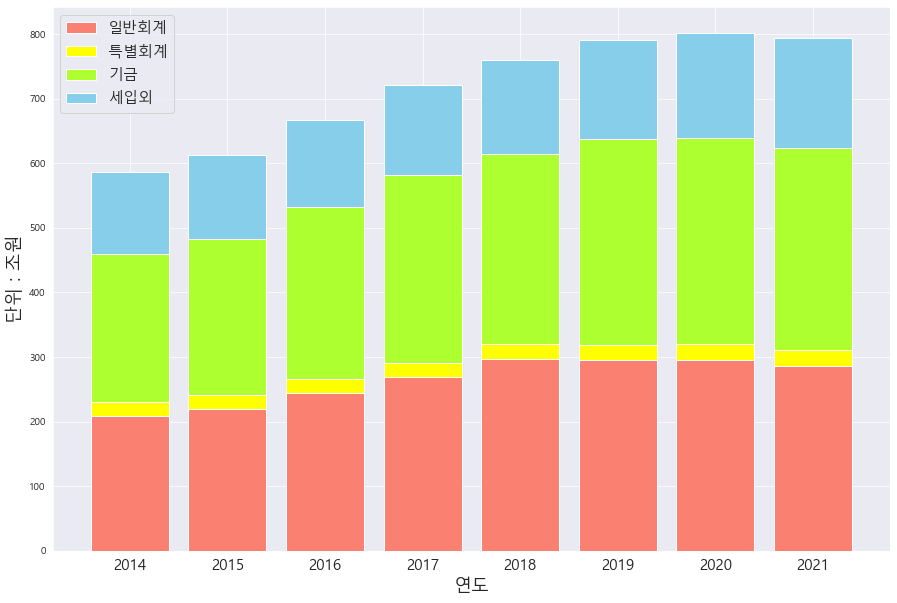

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(15,10))

x = np.arange(len(total_income['연도']))
label = total_income['연도']

p1 = plt.bar(x , total_income['일반회계'], color = 'salmon')

p2 = plt.bar(x, total_income['특별회계'], color = 'yellow', bottom = total_income['일반회계'])

p3 = plt.bar(x, total_income['기금'], color = 'greenyellow', bottom = total_income['일반회계'] + total_income['특별회계'])

p4 = plt.bar(x, total_income['세입외'], color = 'skyblue', bottom = total_income['일반회계'] + total_income['특별회계'] + total_income['기금'])

plt.ylabel('단위 : 조원', fontsize=18)

plt.xlabel('연도', fontsize=18)

plt.xticks(x, label, fontsize=15)

plt.legend((p1[0], p2[0], p3[0], p4[0]), ('일반회계', '특별회계', '기금', '세입외'), fontsize=15)

plt.show()



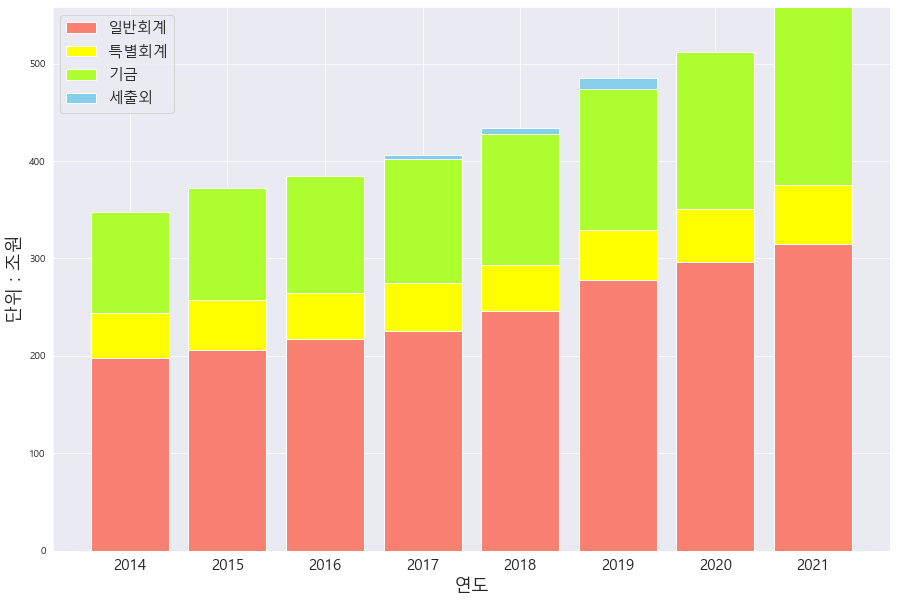

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(15,10))

x = np.arange(len(total_spending['연도']))
label = total_spending['연도']

p1 = plt.bar(x , total_spending['일반회계'], color = 'salmon')

p2 = plt.bar(x, total_spending['특별회계'], color = 'yellow', bottom = total_spending['일반회계'])

p3 = plt.bar(x, total_spending['기금'], color = 'greenyellow', bottom = total_spending['일반회계'] + total_spending['특별회계'])

p4 = plt.bar(x, total_spending['세출외'], color = 'skyblue', bottom = total_spending['일반회계'] + total_spending['특별회계'] + total_spending['기금'])

plt.ylabel('단위 : 조원', fontsize=18)

plt.xlabel('연도', fontsize=18)

plt.xticks(x, label, fontsize=15)

plt.legend((p1[0], p2[0], p3[0], p4[0]), ('일반회계', '특별회계', '기금', '세출외'), fontsize=15)

plt.show()

